# Tutti Category Classification

## Introduction

This notebook attempts to classify listings from tutti.ch, a Swiss second-hand platform, into categories.

The dataset is created by scraping the website and contains the following columns:
- `title`: the title of the insertion
- `body`: the body of the insertion
- `formatted_price`: the price of the insertion
- `timestamp`: the timestamp of the insertion
- `category`: the category of the insertion

## Setup

In [5]:
# Install the requirements
!pip install -r requirements.txt

In [6]:
# Download the dataset
!wget https://filippofinke.ch/dataset.csv -q -O dataset.csv

## Data Exploration

In [7]:
import pandas as pd

# Load the dataset.csv file
df = pd.read_csv('dataset.csv')

In [8]:
# Show the first 5 rows
df.head()

,TITLE,BODY,FORMATTED_PRICE,TIMESTAMP,CATEGORY
0,Occhiali Gucci,"montatura fine e nuova, con garanzia e e-mail ...",250.-,2024-02-23T21:02:19+01:00,accessories
1,Gucci Carré,Carré (foulard) di Gucci\n70 x 70\n100% seta\n...,190.-,2024-02-23T20:37:43+01:00,accessories
2,Gucci Foulard,Foulard di Gucci\n90 x 90\n100% seta\n\nUsato ...,140.-,2024-02-23T20:37:35+01:00,accessories
3,Gucci Foulad,Foulard Fionar di Gucci \n90 x 90\n100% seta\n...,190.-,2024-02-23T20:37:23+01:00,accessories
4,Occhiali da sole Bvlgari,Vendo occhiali da sole Carrera causa inutilizz...,45.-,2024-02-23T20:28:19+01:00,accessories


In [9]:
# Check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84131 entries, 0 to 84130
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TITLE            84131 non-null  object
 1   BODY             84131 non-null  object
 2   FORMATTED_PRICE  84131 non-null  object
 3   TIMESTAMP        84131 non-null  object
 4   CATEGORY         84131 non-null  object
dtypes: object(5)
memory usage: 3.2+ MB


In [10]:
# Check the summary statistics of the dataframe
df.describe()

,TITLE,BODY,FORMATTED_PRICE,TIMESTAMP,CATEGORY
count,84131,84131,84131,84131,84131
unique,78434,81871,1443,81176,84
top,NOLEGGIA SENZA PENSIERI CON I PARTNER LONGRENT,Nuovo,10.-,2024-01-12T07:16:35+01:00,accessories
freq,47,60,5362,4,2000


In [11]:
# Check for missing values
df.isna().sum()

TITLE              0
BODY               0
FORMATTED_PRICE    0
TIMESTAMP          0
CATEGORY           0
dtype: int64

Since there are a lot of categories and subcategories, we will only consider the top-level categories for this classification task.

In [12]:
def map_subcategory_to_category(subcategory):
    category_mapping = {
        'accessories': 'accessories',
        'audioHifi': 'electronics',
        'babyCare': 'childcare',
        'babyClothes': 'clothing',
        'bagsWallets': 'accessories',
        'bicycles': 'sports',
        'birds': 'pets',
        'boats': 'vehicles',
        'buildingMaterials': 'construction',
        'businessOfficeServices': 'business',
        'camping': 'outdoor',
        'carAccessories': 'accessories',
        'caravans': 'vehicles',
        'cars': 'vehicles',
        'cateringHospitalityServices': 'services',
        'cats': 'pets',
        'cds': 'media',
        'cellPhones': 'electronics',
        'childcareCleaning': 'childcare',
        'childrensRoom': 'furniture',
        'comics': 'books',
        'commercialInstallationsFurniture': 'furniture',
        'computerComponentsAccessories': 'electronics',
        'computerServices': 'services',
        'computers': 'electronics',
        'consolesGames': 'electronics',
        'coursesTuitionServices': 'education',
        'craftConstruction': 'construction',
        'craftsServices': 'services',
        'decorationAccessories': 'decor',
        'dogAccessories': 'pets',
        'dogs': 'pets',
        'dvdPlayers': 'electronics',
        'electronicMechanicalServices': 'services',
        'equipmentTools': 'tools',
        'financeLegalServices': 'services',
        'fish': 'pets',
        'fitness': 'sports',
        'food': 'food',
        'furniture': 'furniture',
        'gardenEquipment': 'outdoor',
        'gardenOutfitting': 'outdoor',
        'gastronomy': 'food',
        'handicrafts': 'crafts',
        'healthBeautyServices': 'services',
        'healthcare': 'health',
        'horses': 'pets',
        'householdCleaningServices': 'services',
        'landlinePhones': 'electronics',
        'lighting': 'decor',
        'mensClothes': 'clothing',
        'mensShoes': 'shoes',
        'modeling': 'hobbies',
        'motorcycleAccessories': 'accessories',
        'motorcycles': 'vehicles',
        'musicalInstruments': 'hobbies',
        'navigationSystems': 'electronics',
        'nonFictionBooks': 'books',
        'novels': 'books',
        'officeMaterialFurniture': 'furniture',
        'otherAnimals': 'pets',
        'otherBooks': 'books',
        'otherJobs': 'employment',
        'otherServices': 'services',
        'otherSports': 'sports',
        'petServices': 'services',
        'phoneNavigationAccessories': 'accessories',
        'photoCameras': 'electronics',
        'photoVideoAccessories': 'accessories',
        'propertyMaintenanceServices': 'services',
        'rabbitsRodents': 'pets',
        'reptiles': 'pets',
        'software': 'electronics',
        'strollersSeats': 'baby',
        'tablets': 'electronics',
        'toys': 'toys',
        'transportationMovingServices': 'services',
        'tv': 'electronics',
        'utilityVehicles': 'vehicles',
        'videoCameras': 'electronics',
        'watchesJewelry': 'accessories',
        'winterSports': 'sports',
        'womensClothes': 'clothing',
        'womensShoes': 'shoes'
    }

    return category_mapping.get(subcategory, "Unknown")

# Apply the map_subcategory_to_category function to the CATEGORY column
df['CATEGORY'] = df['CATEGORY'].apply(map_subcategory_to_category)

In [13]:
unique_categories = df["CATEGORY"].unique()

# Show number of categories
print("Total categories: " + str(len(unique_categories)))

# Show the total number of entries
print("Total entries: " + str(len(df)))

# Average entries per category
print("Average entries per category: " + str(len(df) / len(unique_categories)))

# Show the number of entries per category
for category in unique_categories:
    print(category + ": " + str(len(df[df["CATEGORY"] == category])))

Total categories: 25
Total entries: 84131
Average entries per category: 3365.24
accessories: 12404
electronics: 8747
childcare: 1795
clothing: 6000
sports: 7480
pets: 2736
vehicles: 5138
construction: 1260
business: 63
outdoor: 4329
services: 2965
media: 817
furniture: 6664
books: 4927
education: 679
decor: 3742
tools: 2000
food: 715
crafts: 432
health: 70
shoes: 3914
hobbies: 2837
employment: 501
baby: 1916
toys: 2000


<Axes: xlabel='CATEGORY'>

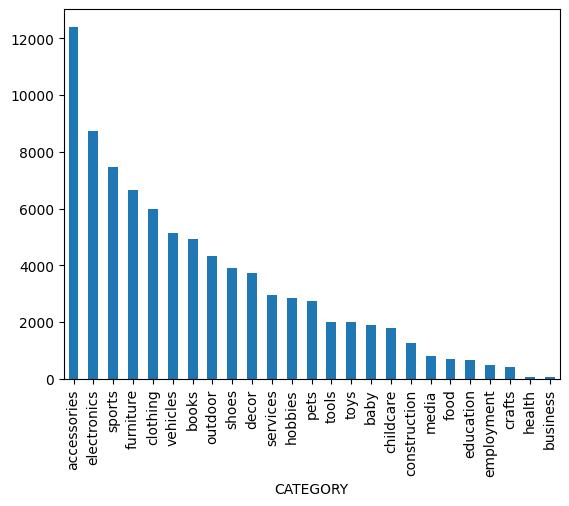

In [14]:
# Plot the number of entries for each CATEGORY 
df['CATEGORY'].value_counts().plot(kind='bar')

<Axes: xlabel='CATEGORY'>

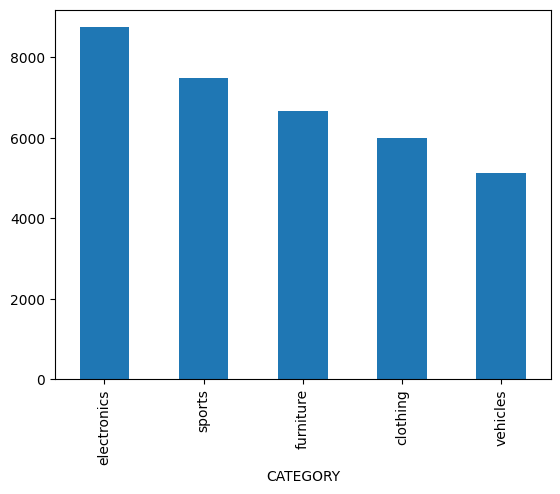

In [15]:
# Keep only the categories with more than 5000 entries and less than 10000 
df = df.groupby('CATEGORY').filter(lambda x: len(x) > 5000 and len(x) < 10000)

# Plot the number of entries for each CATEGORY
df['CATEGORY'].value_counts().plot(kind='bar')

<Axes: xlabel='CATEGORY'>

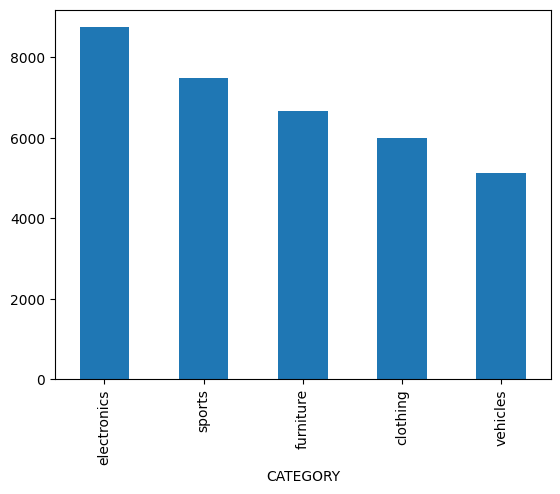

In [16]:
# Plot the number of entries for each CATEGORY
df['CATEGORY'].value_counts().plot(kind='bar')

## Data Preprocessing

In [17]:
# Merge the TILE and DESCRIPTION columns into a new column called TEXT
df['TEXT'] = df['TITLE'] + " " + df['BODY']

In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

def train_and_test(X_train, y_train, X_test, y_test, vectorizer, classifier):
    # Vectorize the text data
    training_features = vectorizer.fit_transform(X_train)
    testing_features = vectorizer.transform(X_test)

    # Train the classifier
    classifier.fit(training_features, y_train)

    # Test the classifier
    predictions = classifier.predict(testing_features)
    categories = sorted(list(set(df['CATEGORY'])))

    # Show the classification report
    print(classification_report(y_test, predictions, target_names=categories))

    # Show the confusion matrix
    cm = confusion_matrix(y_test, predictions, labels=categories)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
    disp.plot()


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['TEXT'], df['CATEGORY'])

## Model Training

### Logistic Regression with CountVectorizer

              precision    recall  f1-score   support

    clothing       0.93      0.94      0.93      1509
 electronics       0.95      0.97      0.96      2144
   furniture       0.95      0.94      0.94      1666
      sports       0.93      0.91      0.92      1903
    vehicles       0.97      0.95      0.96      1286

    accuracy                           0.94      8508
   macro avg       0.94      0.94      0.94      8508
weighted avg       0.94      0.94      0.94      8508



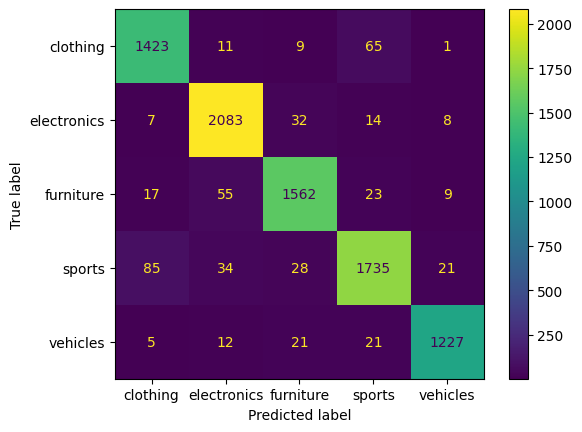

In [19]:
vectorizer = CountVectorizer()
log_count_classifier = LogisticRegression()
train_and_test(X_train, y_train, X_test, y_test, vectorizer, log_count_classifier)

### Logistic Regression with TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/filippofinke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


              precision    recall  f1-score   support

    clothing       0.94      0.94      0.94      1509
 electronics       0.93      0.98      0.96      2144
   furniture       0.95      0.93      0.94      1666
      sports       0.94      0.92      0.93      1903
    vehicles       0.97      0.96      0.97      1286

    accuracy                           0.95      8508
   macro avg       0.95      0.94      0.95      8508
weighted avg       0.95      0.95      0.95      8508



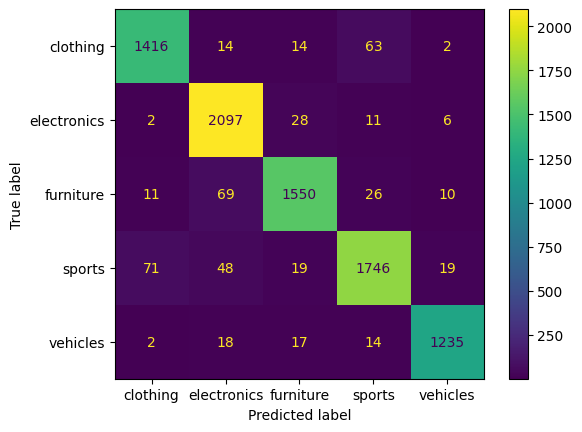

In [20]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Fetch Italian stop words
italian_stop_words = stopwords.words('italian')

vectorizer = TfidfVectorizer(
    stop_words= italian_stop_words,
)
log_tfid_classifier = LogisticRegression()
train_and_test(X_train, y_train, X_test, y_test, vectorizer, log_tfid_classifier)

### Multinomial Naive Bayes with CountVectorizer

              precision    recall  f1-score   support

    clothing       0.84      0.95      0.89      1509
 electronics       0.93      0.97      0.95      2144
   furniture       0.96      0.86      0.91      1666
      sports       0.92      0.85      0.88      1903
    vehicles       0.95      0.96      0.95      1286

    accuracy                           0.92      8508
   macro avg       0.92      0.92      0.92      8508
weighted avg       0.92      0.92      0.92      8508



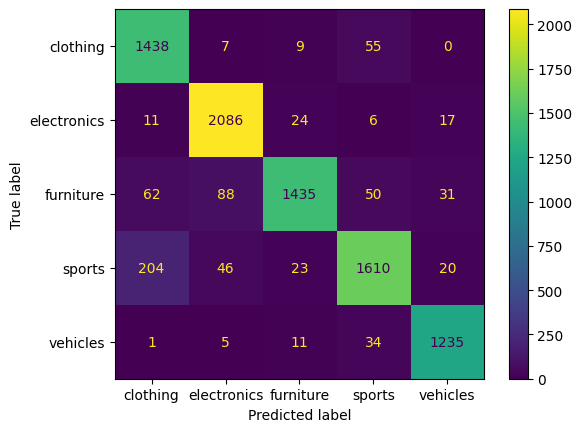

In [21]:
vectorizer = CountVectorizer()
multi_vec_classifier = MultinomialNB()
train_and_test(X_train, y_train, X_test, y_test, vectorizer, multi_vec_classifier)

## Data Processing for Neural Networks

In [22]:
from sklearn.model_selection import train_test_split
import re
import nltk
import simplemma
nltk.download('punkt')
nltk.download('stopwords')

# Tokenize the words
df['text_clean'] = df['TEXT'].apply(nltk.word_tokenize)

# Convert to lowercase
df['text_clean'] = df['text_clean'].apply(lambda x: [item.lower() for item in x])

# Remove stop words
stop_words=set(nltk.corpus.stopwords.words("italian"))
df['text_clean'] = df['text_clean'].apply(lambda x: [item for item in x if item not in stop_words])

# Remove punctuation, keep letters and numbers
df['text_clean'] = df['text_clean'].apply(lambda x: [re.sub(r'[^a-zA-Z0-9]', '', item) for item in x])

# Remove empty strings
df['text_clean'] = df['text_clean'].apply(lambda x: [item for item in x if item])

# Lemmatization
df['text_clean'] = df['text_clean'].apply(lambda x: [simplemma.lemmatize(item, lang="it") or item for item in x])

# Join the words again to form sentences
df["text_clean"] = df.text_clean.apply(lambda x: " ".join(x))

df_train, df_test = train_test_split(df, test_size=0.3, random_state=13)

# Show TEXT and clean_text columns and difference with the whole text
for i in range(5):
    print("Original text: ", df_train['TEXT'].iloc[i])
    print("Clean text: ", df_train['text_clean'].iloc[i])
    print("Category:", df_train['CATEGORY'].iloc[i])
    print("\n")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/filippofinke/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/filippofinke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original text:  Mantello Falconeri Bellissimo mantello Falconeri 100% lana color grigio. Ottimo stato 
Usato 2 volte
Clean text:  mantello falconeri bellissimo mantello falconeri 100 lana colore grigio ottimo stato usare 2 volta
Category: clothing


Original text:  Scarponi da sci bambino Taglia 35, mm 251.
Clean text:  scarpone sciare bambino taglia 35 mm 251
Category: sports


Original text:  Nuovo cavo Jack audio video Da ritirare in zona Lugano 
Spedisco in Svizzera 
Possibile pagare con twint
Clean text:  nuovo cavare jack audio video ritirare zona lugano spedire svizzera possibile pagare twint
Category: electronics


Original text:  Pattini in linea vendo pattini in linea usati una sola volta N° 36.
Clean text:  pattino linea vendere pattino linea usato solo volta n 36
Category: sports


Original text:  Pantalone Adidas Messi Pantalone adidas messi numero 10 nuovo con etichetta con taglia mostrata nelle foto
Clean text:  pantalone adidas messe pantalone adidas messe numero 10 nuo

### Neural Network

In [23]:
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Input

# Model Options
hidden_size = 8
activation_function = 'relu'
output_activation = 'softmax'
optimizer = 'adam'
loss_function = 'sparse_categorical_crossentropy'
epochs = 20
batch_size = 32

train_data = df_train['text_clean']
test_data = df_test['text_clean']
train_labels = df_train['CATEGORY']
test_labels = df_test['CATEGORY']

# Convert labels to numerical values
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

train_vectors.sort_indices()
test_vectors.sort_indices()

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define the model
model = models.Sequential([
    
    Input(shape=(train_vectors.shape[1],)),
    layers.Dense(hidden_size, activation=activation_function),
    layers.Dense(np.max(train_labels) + 1, activation=output_activation)
])

model.compile(optimizer=optimizer,
              loss=loss_function,
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_vectors,
    train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(test_vectors, test_labels),
    callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_vectors, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/20
745/745 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6016 - loss: 1.3170 - val_accuracy: 0.9268 - val_loss: 0.5086
Epoch 2/20
745/745 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9550 - loss: 0.3836 - val_accuracy: 0.9426 - val_loss: 0.2466
Epoch 3/20
745/745 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.1654 - val_accuracy: 0.9480 - val_loss: 0.1842
Epoch 4/20
745/745 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9836 - loss: 0.0965 - val_accuracy: 0.9506 - val_loss: 0.1608
Epoch 5/20
745/745 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9885 - loss: 0.0654 - val_accuracy: 0.9510 - val_loss: 0.1505
Epoch 6/20
745/745 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9913 - loss: 0.0472 - val_accuracy: 0.9520 - val_loss: 0.1461
Epoch 7/20
745/745 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9933 - loss: 0.0342 - val_accuracy: 0.9524 - val_loss: 0.1457
Epoch 8/20
745/745 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9940 - loss: 0.0272 - val_accuracy: 0.

320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step
              precision    recall  f1-score   support

    clothing       0.93      0.95      0.94      1759
 electronics       0.97      0.98      0.97      2675
   furniture       0.95      0.94      0.94      1982
      sports       0.94      0.92      0.93      2230
    vehicles       0.98      0.96      0.97      1563

    accuracy                           0.95     10209
   macro avg       0.95      0.95      0.95     10209
weighted avg       0.95      0.95      0.95     10209



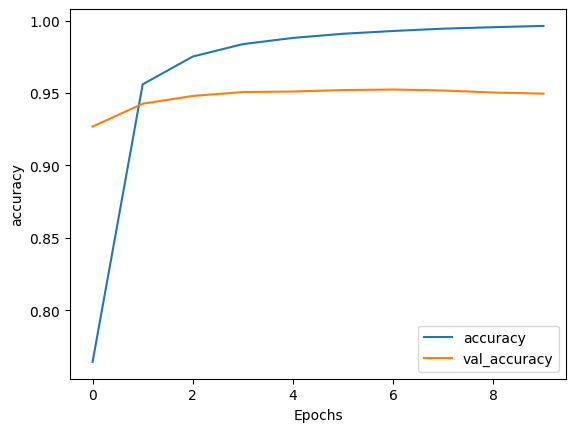

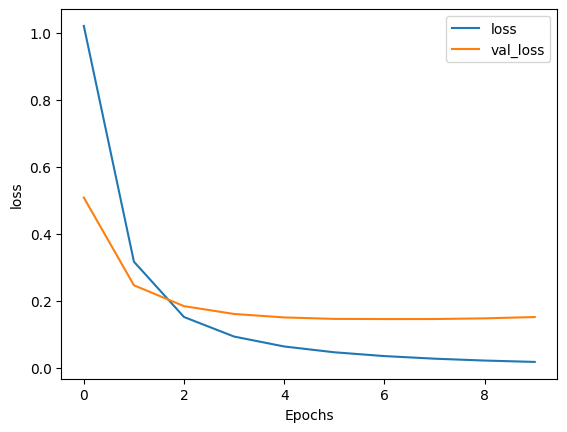

In [24]:
y_pred = np.argmax(model.predict(test_vectors), axis=1)
print(classification_report(test_labels, y_pred, target_names=label_encoder.classes_))

import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### Neural Network with Pretrained Word Embeddings

Download the pretrained word embeddings for the italian language.

In [25]:
!wget https://filippofinke.ch/word2vec.wordvectors -O word2vec.wordvectors
!wget https://filippofinke.ch/word2vec.wordvectors.vectors.npy -O word2vec.wordvectors.vectors.npy

--2024-04-24 21:12:19--  https://filippofinke.ch/word2vec.wordvectors
Resolving filippofinke.ch (filippofinke.ch)... 188.114.97.12, 188.114.96.12
Connecting to filippofinke.ch (filippofinke.ch)|188.114.97.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20668604 (20M) [application/octet-stream]
Saving to: ‘word2vec.wordvectors’

word2vec.wordvector 100%[===================>]  19,71M  40,9MB/s    in 0,5s    

2024-04-24 21:12:20 (40,9 MB/s) - ‘word2vec.wordvectors’ saved [20668604/20668604]

--2024-04-24 21:12:20--  https://filippofinke.ch/word2vec.wordvectors.vectors.npy
Resolving filippofinke.ch (filippofinke.ch)... 188.114.96.12, 188.114.97.12
Connecting to filippofinke.ch (filippofinke.ch)|188.114.96.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224203728 (214M) [application/octet-stream]
Saving to: ‘word2vec.wordvectors.vectors.npy’

word2vec.wordvector 100%[===================>] 213,82M  39,3MB/s    in 5,2s    

2024-04-24

In [26]:
from gensim.models import KeyedVectors
import numpy as np

model = KeyedVectors.load("word2vec.wordvectors", mmap='r')

def sentences_to_glove_vectors(sentences, glove, embedding_dim=50):
    def sentence_to_glove_vector(sentence):
        words = sentence.lower().split()
        word_vectors = [glove[word] for word in words if word in glove]
        return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(embedding_dim)

    return np.array([sentence_to_glove_vector(sentence) for sentence in sentences])

train_vectors = sentences_to_glove_vectors(train_data, model, 100)
test_vectors = sentences_to_glove_vectors(test_data, model, 100)  

In [27]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

hidden_size = 8
num_epochs = 20
batch_size = 32
learning_rate = 0.01

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_size, input_shape=(train_vectors.shape[1],), activation='relu'),
    tf.keras.layers.Dense(np.max(train_labels) + 1, activation='softmax')
])

X_train, X_val, y_train, y_val = train_test_split(
    train_vectors, np.array(train_labels), test_size=0.2, random_state=42
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train,
    y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    verbose=1,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)


_, test_acc = model.evaluate(test_vectors, np.array(test_labels), verbose=0)
print(f'Test accuracy: {100 * test_acc:.2f}%')


Epoch 1/20


/Users/filippofinke/Desktop/Progetti/tutti-category-classification/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 505us/step - accuracy: 0.6202 - loss: 0.9500 - val_accuracy: 0.8176 - val_loss: 0.5475
Epoch 2/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.8150 - loss: 0.5311 - val_accuracy: 0.8228 - val_loss: 0.5264
Epoch 3/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.8224 - loss: 0.5242 - val_accuracy: 0.8314 - val_loss: 0.4995
Epoch 4/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8290 - loss: 0.4989 - val_accuracy: 0.8321 - val_loss: 0.4962
Epoch 5/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.8257 - loss: 0.4947 - val_accuracy: 0.8266 - val_loss: 0.5121
Epoch 6/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.8336 - loss: 0.4880 - val_accuracy: 0.8312 - val_loss: 0.5088
Epoch 7/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.8288 - loss: 0.5024 - val_accuracy: 0.8359 - val_loss: 0.5016
Test accuracy: 82.39%


320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step
              precision    recall  f1-score   support

    clothing       0.79      0.88      0.83      1759
 electronics       0.88      0.89      0.89      2675
   furniture       0.82      0.79      0.80      1982
      sports       0.79      0.70      0.74      2230
    vehicles       0.82      0.86      0.84      1563

    accuracy                           0.82     10209
   macro avg       0.82      0.82      0.82     10209
weighted avg       0.82      0.82      0.82     10209



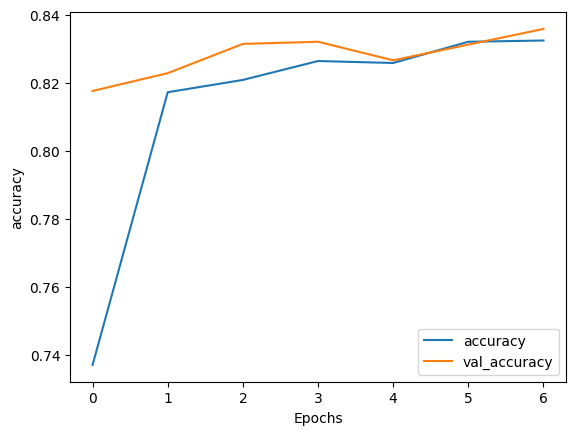

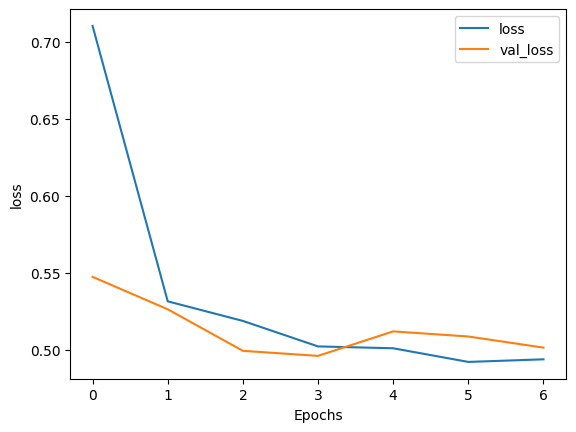

In [28]:
y_pred = np.argmax(model.predict(test_vectors), axis=1)
print(classification_report(test_labels, y_pred, target_names=label_encoder.classes_))

import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [29]:
import pandas as pd

misclassified_df = pd.DataFrame(columns=['Index', 'True Label', 'Predicted Label'])

for idx, (text, true_label, pred_label) in enumerate(zip(test_data, test_labels, y_pred)):
    if true_label != pred_label:
        misclassified_example = pd.DataFrame({'Index': [idx], 'Text': [text], 'True Label': [true_label], 'Predicted Label': [pred_label]})
        misclassified_df = pd.concat([misclassified_df, misclassified_example], ignore_index=True)

label_map = {idx: label for idx, label in enumerate(label_encoder.classes_)}
misclassified_df['True Label'] = misclassified_df['True Label'].replace(label_map)
misclassified_df['Predicted Label'] = misclassified_df['Predicted Label'].replace(label_map)


misclassified_df.head()

,Index,True Label,Predicted Label,Text
0,2,furniture,electronics,vendere paracolpi vendere paracolpi buono stat...
1,13,sports,clothing,waveboard vendere due waveboard viola blu disp...
2,20,electronics,clothing,carta regalare xbox lho comprare errore usarlo...
3,25,vehicles,sports,solex fermo po tempo
4,37,sports,clothing,giacca sciare pantalone sciare isolato imperme...


### Bert Model

In [30]:
from transformers import AutoTokenizer
from datasets import Dataset
import datasets
import os

pretrained_model = "dbmdz/bert-base-italian-uncased"

pretrained_model = "dbmdz/bert-base-italian-xxl-uncased"


# Check if model is already trained and exists in the folder
already_trained = os.path.exists(pretrained_model + "_tutti")

tokenizer = AutoTokenizer.from_pretrained(pretrained_model)

if already_trained:
    print("Model already trained")
else:
    # Load the BERT tokenizer

    # Keep only text and category columns
    df = df[['TEXT', 'CATEGORY']]

    # renambe TEXT to text
    df = df.rename(columns={"TEXT": "text", "CATEGORY": "label"})

    # Convert the labels to numerical values
    label_encoder = LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['label'])

    # Create a train, validation and test dataset from df
    df_train, df_test = train_test_split(df, test_size=0.3, random_state=13)
    df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=13)

    train_dataset = Dataset.from_pandas(df_train)
    val_dataset = Dataset.from_pandas(df_val)
    test_dataset = Dataset.from_pandas(df_test)

    dataset = datasets.DatasetDict({
        "train": train_dataset,
        "validation": val_dataset,
        "test": test_dataset
    })


    def tokenize_function(examples):
        return tokenizer(examples["text"], padding="max_length", truncation=True)

    tokenized_dataset = dataset.map(tokenize_function, batched=True)


Model already trained


In [32]:
if not already_trained:
    tokenized_dataset

In [33]:
from transformers import AutoModelForSequenceClassification

if not already_trained:
    labels = len(df["label"].unique())

    model = AutoModelForSequenceClassification.from_pretrained(pretrained_model, num_labels=labels)

In [34]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

In [35]:
def compute_metrics(eval_pred):

    logits, labels = eval_pred

    predictions = np.argmax(logits, axis=-1)

    return metric.compute(predictions=predictions, references=labels)

In [36]:
from transformers import TrainingArguments, Trainer

if not already_trained:
    training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch")

In [37]:
if not already_trained:
    trainer = Trainer(

        model=model,

        args=training_args,

        train_dataset=tokenized_dataset["train"],

        eval_dataset=tokenized_dataset["validation"],

        compute_metrics=compute_metrics,

    )

In [38]:
if not already_trained:
    trainer.train()

In [39]:
if not already_trained:
    trainer.save_model(pretrained_model + "_tutti")

In [40]:
from transformers import pipeline

text_classifier = pipeline(

    task="text-classification", model=pretrained_model + "_tutti",
    tokenizer = tokenizer,

)

result = text_classifier("Vendo iPhone 12 Pro Max 256GB")
# Print the label and replace LABEL_
label = label_encoder.inverse_transform([int(result[0]['label'].replace("LABEL_",""))])[0]
print(f"Predicted category: {label}")

Predicted category: electronics


In [42]:
from sklearn.metrics import classification_report

if not already_trained:
  verbose = True
  full = True

  test_subset = tokenized_dataset["test"]

  labels = label_encoder.classes_

  if not full:
    N=20
    test_subset=test_subset.shuffle(seed=77).select(range(N))

  y_pred = []
  y_true = []

  for num in range(len(test_subset)):

    if num % 10 == 0:
      print ("Ho classificato "+str(num)+" su "+str(len(test_subset))+" esempi")

    preds = text_classifier(test_subset[num]['text'][0:512])
    y_pred.append(int(preds[0]['label'].split('_')[-1]))
    y_true.append(int(test_subset[num]['label']))
    if verbose:
      if int(y_true[-1]) != int(y_pred[-1]):
        print ('classificazione: ', labels[y_pred[-1]])
        print ('ground truth: ', labels[y_true[-1]])
        print (test_subset[num]['text'])
  
  print(classification_report(y_true, y_pred, target_names=labels))


# Gradio Interface

In [50]:
import gradio as gr
def predict_category(text):
    result = text_classifier(text)
    label = result[0]['label'].replace("LABEL_", "")
    # Get the category name
    label = label_encoder.inverse_transform([int(label)])[0]
    return label

# Create Gradio interface
text_input = gr.components.Textbox(lines=5, label="Enter text:")
output_text = gr.components.Textbox(label="Predicted category")

interface = gr.Interface(fn=predict_category, inputs=text_input, outputs=output_text, title="Text Classification")

# Launch interface
interface.launch()

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.
